# Computer Vision - Linear filtering

In [2]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ipywidgets import interact

plt.rcParams['figure.figsize'] = [12, 8]

#### Step 1: load the image
Load an image and convert it in grayscale image.

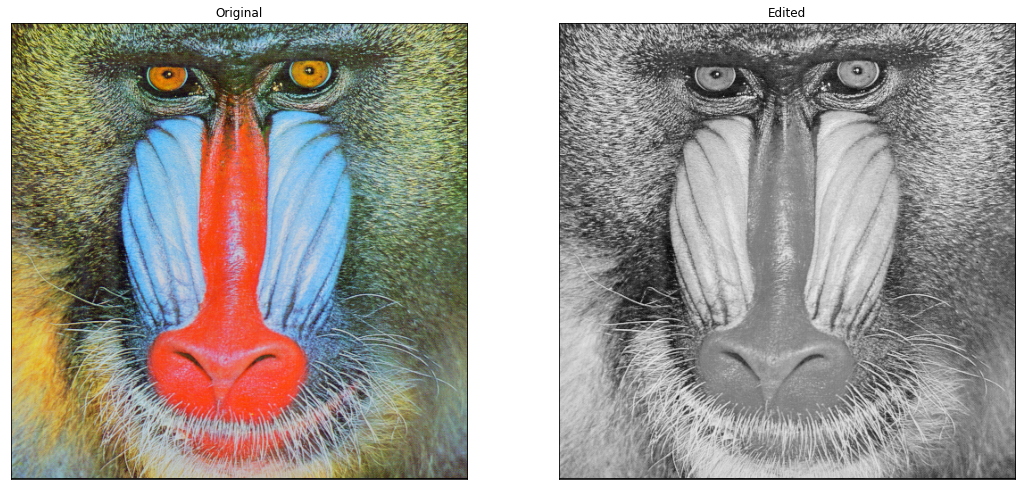

In [24]:
image = cv2.imread('../Images/baboon.png')

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display two images
def display_two(original_img, edited_img, title1 = "Original", title2 = "Edited", isGray=False):
    plt.figure(figsize=(18,13))
    
    plt.subplot(121)
    if isGray:
        # If we want to display a gray image, we have to tell pyplot to use a gray color map,
        # otherwise it will not render the image as grayscale
        plt.imshow(original_img, cmap="gray") 
    else:
        plt.imshow(original_img)
    plt.title(title1), plt.xticks([]), plt.yticks([])
    
    plt.subplot(122)
    
    if isGray:
        plt.imshow(edited_img, cmap="gray")
    else:
        plt.imshow(edited_img)
    plt.title(title2), plt.xticks([]), plt.yticks([])

    plt.show()
    

display_two(rgb_image, gray_image, isGray=True)

#### Step 2: Average filtering
The most basic linear filtering is a moving average of the image.  

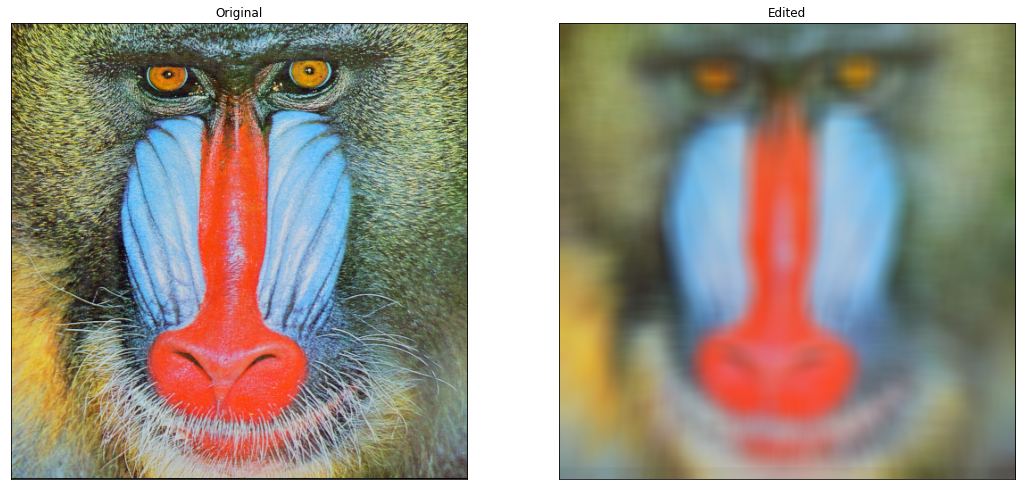

In [26]:
kernel_size = 25
kernel = np.ones((kernel_size,kernel_size),np.float32)/kernel_size**2
edited_img_avg = cv2.filter2D(rgb_image,-1,kernel)
display_two(rgb_image, edited_img)

#### Step 3: Uniform blurring
What is the difference between average filtering and uniform blurring?

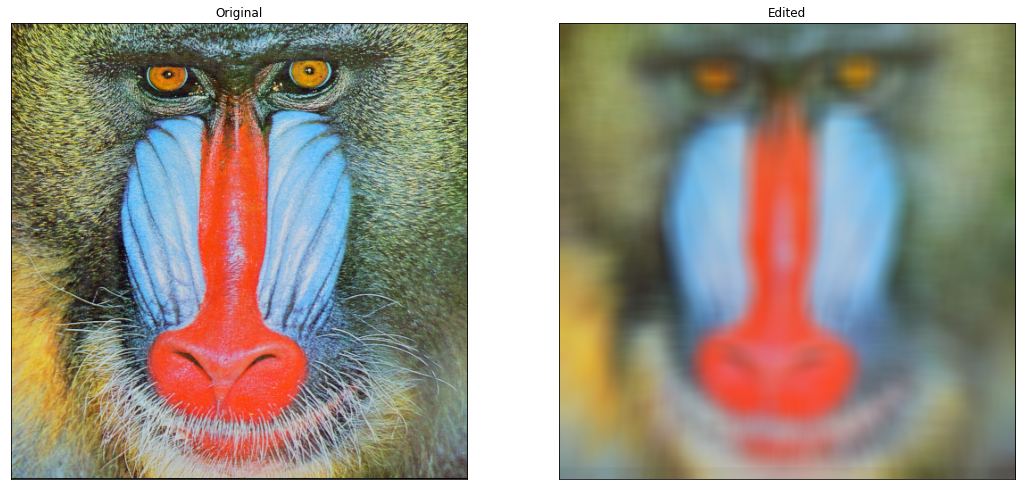

In [27]:
kernel_size = 25
edited_img_blur = cv2.blur(rgb_image,(kernel_size,kernel_size))
display_two(rgb_image, edited_img)


In [30]:
(edited_img_blur == edited_img_avg).all()

True

> There is none

#### Step 4: Gaussian blurring
What is the difference between uniform and gaussian blurring?

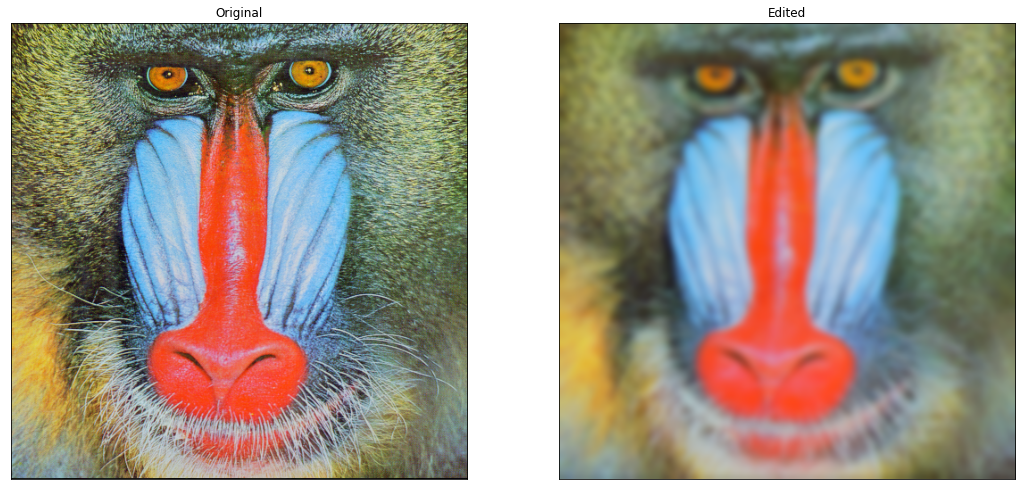

In [15]:
kernel_size = 25
edited_img = cv2.GaussianBlur(rgb_image,(kernel_size,kernel_size),cv2.BORDER_DEFAULT)
display_two(rgb_image, edited_img)


#### Extra : Bilateral blurring

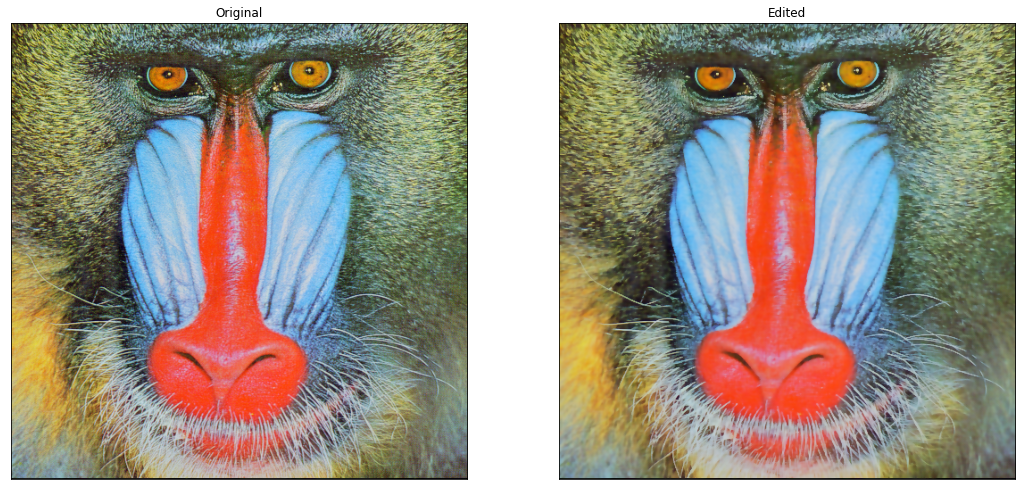

In [23]:

sigma_color = 75
sigma_space = 75

edited_img = cv2.bilateralFilter(rgb_image,5,sigma_color,sigma_space)
display_two(rgb_image, edited_img)


#### Step 5: High pass filter
(We substract the low pass filtered image from the original)

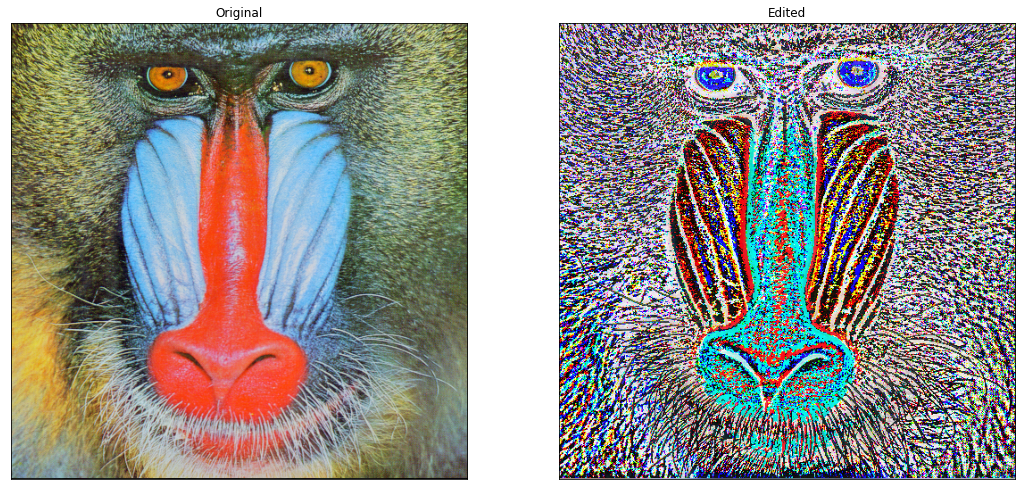

In [37]:
kernel_size = 101
edited_img = cv2.GaussianBlur(rgb_image,(kernel_size,kernel_size),cv2.BORDER_DEFAULT)

high_pass_image = rgb_image - edited_img
display_two(rgb_image, high_pass_image)
